In [ ]:
pip install h5py

In [2]:
import os.path
import glob
import shutil
import h5py
import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation


import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [3]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [4]:
data_dir ="./Datatset"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Basalt','Coal','Granite','Limestone','Marble','Sandstone','Quartzite'])
print('Class Names: ', CLASS_NAMES)

Class Names:  ['Basalt' 'Coal' 'Granite' 'Limestone' 'Marble' 'Sandstone' 'Quartzite']


In [5]:
train_path = "C:/Users/rahul/OneDrive/Desktop/Practice/Dataset"
test_path = "C:/Users/rahul/OneDrive/Desktop/Practice/Dataset"

In [6]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 2069 images belonging to 7 classes.
Found 2069 images belonging to 7 classes.


In [7]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

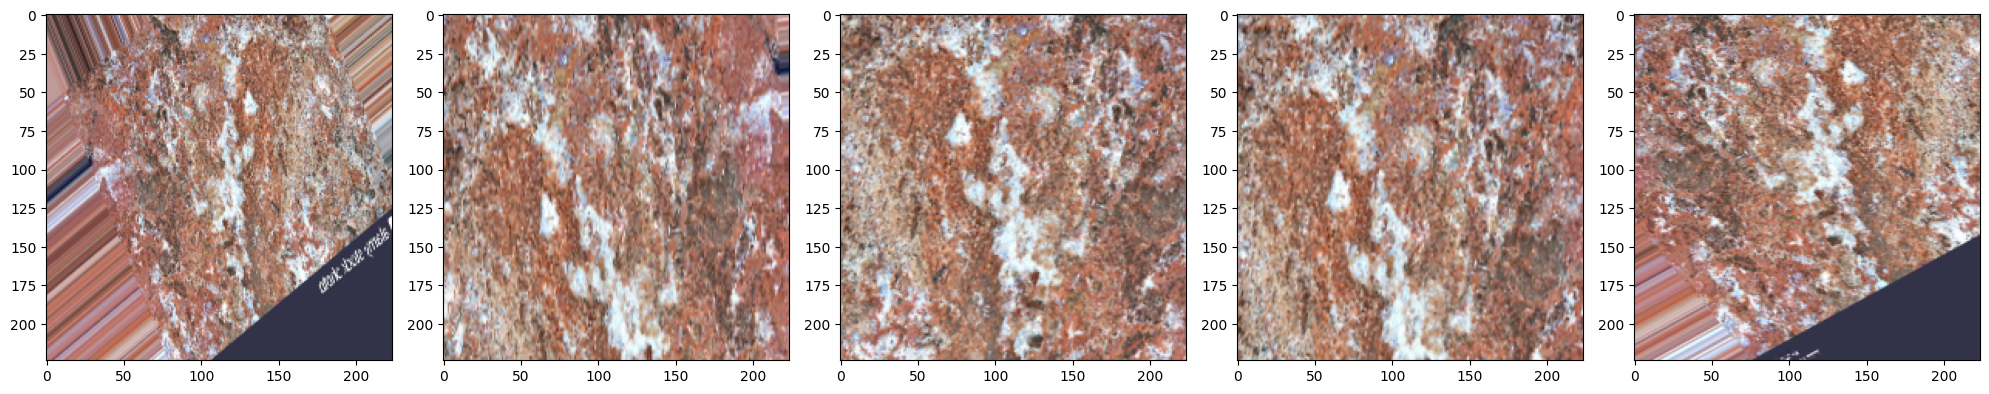

In [8]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

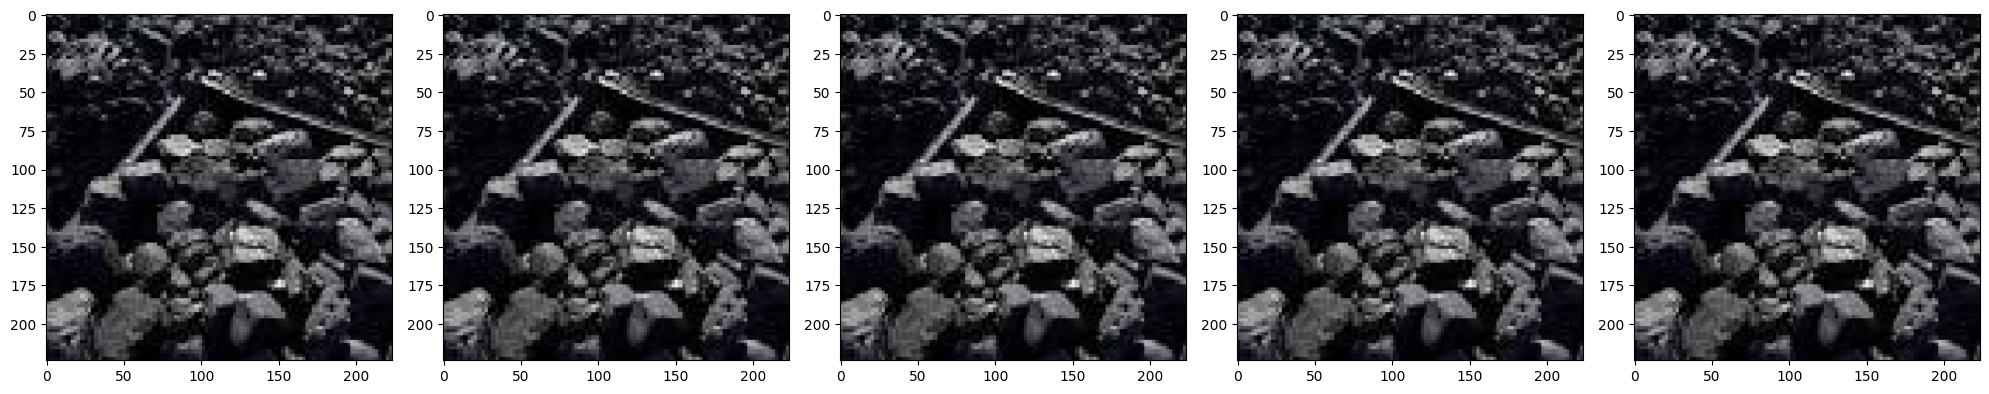

In [9]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [11]:
# Model building
#Instatiating A convnet

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(256, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(512, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(7, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 128)      

In [12]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,           # Number of epochs with no improvement to wait before stopping
    restore_best_weights=True  # Restore the best model weights
)

AttributeError: module 'tensorflow_core.compat.v2' has no attribute '__internal__'

In [14]:
EPOCHS=50
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 259 steps, validate for 259 steps
Epoch 1/50
259/259 [==============================] - 127s 490ms/step - loss: 1.5666 - accuracy: 0.3842 - val_loss: 1.5163 - val_accuracy: 0.3804
Epoch 2/50
259/259 [==============================] - 123s 476ms/step - loss: 1.4812 - accuracy: 0.4152 - val_loss: 1.4149 - val_accuracy: 0.4558
Epoch 3/50
259/259 [==============================] - 80s 310ms/step - loss: 1.4675 - accuracy: 0.4326 - val_loss: 1.7076 - val_accuracy: 0.4374
Epoch 4/50
259/259 [==============================] - 80s 309ms/step - loss: 1.4712 - accuracy: 0.4311 - val_loss: 1.4030 - val_accuracy: 0.4316
Epoch 5/50
259/259 [==============================] - 79s 306ms/step - loss: 1.4467 - accuracy: 0.4316 - val_loss: 1.3637 - val_accuracy: 0.4809
Epoch 6/50
259/259 [==============================] - 79s 304ms/step - loss: 1.4378 - accuracy: 0.4490 - val_loss: 1.4477 - val_accuracy: 0.4592
Epoch 7/50
259/259 [==============

KeyboardInterrupt: 

In [ ]:
import h5py
model.save('my_model.h5')

In [ ]:
# Specify the local file path where you want to save the model
local_path = 'C:\\Users\\rahul\\OneDrive\\Desktop\\Practice\\ModelWeights'

# Save the model as a SavedModel
tf.saved_model.save(model, local_path)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a `history` object with recorded metrics
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Assuming you also have a variable `EPOCHS` that represents the number of epochs
EPOCHS_1 = 36
epochs_range = range(1, EPOCHS_1+ 1)  # Start from epoch 1

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the pre-trained model
#model = tf.keras.models.load_model("your_model_path_here")

# Load and preprocess the image
image_path = "C:\\Users\\rahul\\OneDrive\\Desktop\\Practice\\Dataset\\Sandstone\\2.jpg"
image = Image.open(image_path)
image = image.resize((IMG_WIDTH, IMG_HEIGHT))  # Resize to match the model's input dimensions
image = np.array(image) / 255.0  # Normalize pixel values (if needed)
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(image)
# Interpret the predictions (depends on your model and task)
# For example, if it's an image classification task:
predicted_class = np.argmax(predictions, axis=1)
class_labels = ['Basalt','Coal','Granite','Limestone','Marble','Sandstone','Quartzite'] # Replace with your class labels
predicted_label = class_labels[predicted_class[0]]
print("Predicted class:", predicted_label)
